In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import SGDClassifier,RidgeClassifier
from sklearn.model_selection import cross_val_score

In [23]:
df_W7=pd.read_csv('/content/drive/MyDrive/24Jan_DL/ToN-IoT/Train_Test_datasets/Train_Test_Windows_dataset/Train_Test_Windows_7.csv')
df_W10=pd.read_csv('/content/drive/MyDrive/24Jan_DL/ToN-IoT/Train_Test_datasets/Train_Test_Windows_dataset/Train_Test_Windows_10.csv')

In [4]:
df_W7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15980 entries, 0 to 15979
Columns: 134 entries, Processor(_Total) DPC Rate to type
dtypes: float64(1), int64(65), object(68)
memory usage: 16.3+ MB


In [5]:
Column=list(df_W7.columns)
Column

['Processor(_Total) DPC Rate',
 'Processor(_Total) pct_ Idle Time',
 'Processor(_Total) pct_ C3 Time',
 'Processor(_Total) pct_ Interrupt Time',
 'Processor(_Total) pct_ C2 Time',
 'Processor(_Total) pct_ User Time',
 'Processor(_Total) pct_ C1 Time',
 'Processor(_Total) pct_ Processor Time',
 'Processor(_Total) C1 Transitions sec',
 'Processor(_Total) pct_ DPC Time',
 'Processor(_Total) C2 Transitions sec',
 'Processor(_Total) pct_ Privileged Time',
 'Processor(_Total) C3 Transitions sec',
 'Processor(_Total) DPCs Queued sec',
 'Processor(_Total) Interrupts sec',
 'Process(_Total) Pool Paged Bytes',
 'Process(_Total) IO Read Operations sec',
 'Process(_Total) Working Set - Private',
 'Process(_Total) Working Set Peak',
 'Process(_Total) IO Write Operations sec',
 'Process(_Total) Page File Bytes',
 'Process(_Total) pct_ User Time',
 'Process(_Total) Virtual Bytes Peak',
 'Process(_Total) Page File Bytes Peak',
 'Process(_Total) IO Other Bytes sec',
 'Process(_Total) Private Bytes',
 '

In [6]:
Obj_columns=[i for i in Column if df_W7[i].dtype=='object']
#df_W7['Network_I(Intel R _Pro_1000MT) Packets Outbound Errors'].dtype
Obj_columns

['Processor(_Total) pct_ Idle Time',
 'Processor(_Total) pct_ C3 Time',
 'Processor(_Total) pct_ Interrupt Time',
 'Processor(_Total) pct_ C2 Time',
 'Processor(_Total) pct_ User Time',
 'Processor(_Total) pct_ C1 Time',
 'Processor(_Total) pct_ Processor Time',
 'Processor(_Total) C1 Transitions sec',
 'Processor(_Total) pct_ DPC Time',
 'Processor(_Total) C2 Transitions sec',
 'Processor(_Total) pct_ Privileged Time',
 'Processor(_Total) C3 Transitions sec',
 'Processor(_Total) DPCs Queued sec',
 'Processor(_Total) Interrupts sec',
 'Process(_Total) IO Read Operations sec',
 'Process(_Total) IO Write Operations sec',
 'Process(_Total) pct_ User Time',
 'Process(_Total) IO Other Bytes sec',
 'Process(_Total) IO Write Bytes sec',
 'Process(_Total) pct_ Processor Time',
 'Process(_Total) Page Faults sec',
 'Process(_Total) IO Other Operations sec',
 'Process(_Total) IO Data Operations sec',
 'Process(_Total) pct_ Privileged Time',
 'Process(_Total) IO Data Bytes sec',
 'Process(_Total) 

In [7]:
df_W7[Obj_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15980 entries, 0 to 15979
Data columns (total 68 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   Processor(_Total) pct_ Idle Time                                 15980 non-null  object
 1   Processor(_Total) pct_ C3 Time                                   15980 non-null  object
 2   Processor(_Total) pct_ Interrupt Time                            15980 non-null  object
 3   Processor(_Total) pct_ C2 Time                                   15980 non-null  object
 4   Processor(_Total) pct_ User Time                                 15980 non-null  object
 5   Processor(_Total) pct_ C1 Time                                   15980 non-null  object
 6   Processor(_Total) pct_ Processor Time                            15980 non-null  object
 7   Processor(_Total) C1 Transitions sec             

In [8]:
#df_W7['Processor(_Total) pct_ C3 Time'].replace(['0',' '],0,inplace=True)

In [9]:
#df_W7['Processor(_Total) pct_ Idle Time'].value_counts().index

In [51]:
df_W7

,Processor(_Total) DPC Rate,Processor(_Total) pct_ Idle Time,Processor(_Total) pct_ C3 Time,Processor(_Total) pct_ Interrupt Time,Processor(_Total) pct_ C2 Time,Processor(_Total) pct_ User Time,Processor(_Total) pct_ C1 Time,Processor(_Total) pct_ Processor Time,Processor(_Total) C1 Transitions sec,Processor(_Total) pct_ DPC Time,...,Memory Available MBytes,Memory Modified Page List Bytes,Memory Cache Faults sec,Memory Committed Bytes,Memory System Driver Total Bytes,Memory Pages Input sec,Memory Pool Paged Resident Bytes,Memory Write Copies sec,label,type
0,0.0,85.520833,0.0,0.000000,0.0,13.125000,86.666667,14.479167,59.354632,0.520833,...,251.0,12070912.0,0.466834,1.943323e+09,5849088.0,1.200431,27090944.0,0.0,1.0,1
1,0.0,73.854167,0.0,0.000000,0.0,24.687500,73.333333,26.145833,52.199537,0.208333,...,267.0,12025856.0,0.599995,1.933844e+09,5849088.0,7.599933,27181056.0,0.0,1.0,1
2,0.0,85.833333,0.0,0.000000,0.0,13.125000,86.666667,14.166667,59.065490,0.208333,...,256.0,11960320.0,0.399992,1.937002e+09,5849088.0,0.000000,27185152.0,0.0,1.0,1
3,0.0,88.541667,0.0,0.000000,0.0,10.729167,86.666667,11.458333,62.000563,0.104167,...,262.0,12066816.0,0.400004,1.930117e+09,5849088.0,0.000000,27185152.0,0.0,1.0,1
4,0.0,83.541667,0.0,0.104167,0.0,14.791667,80.000000,16.458333,76.732590,0.312500,...,240.0,118784.0,4.666621,1.960501e+09,5849088.0,74.065949,27201536.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15975,0.0,99.375000,0.0,0.104167,0.0,0.208333,93.333333,0.625000,69.395992,0.000000,...,512.0,28692480.0,0.000000,9.891594e+08,5832704.0,0.000000,33837056.0,0.0,1.0,6
15976,0.0,98.958333,0.0,0.000000,0.0,0.312500,93.333333,1.041667,69.066185,0.104167,...,510.0,28655616.0,0.000000,9.915597e+08,5832704.0,0.000000,33837056.0,0.0,1.0,6
15977,0.0,99.583333,0.0,0.000000,0.0,0.208333,100.000000,0.416667,69.535552,0.104167,...,510.0,28504064.0,0.000000,9.905562e+08,5832704.0,0.000000,33837056.0,0.0,1.0,6
15978,0.0,99.166667,0.0,0.104167,0.0,0.208333,100.000000,0.833333,69.135358,0.104167,...,509.0,27869184.0,0.000000,9.917399e+08,5832704.0,0.000000,33894400.0,0.0,1.0,6


In [11]:
# Finding mean and replace the missing value with mean
for i in df_W7.columns[:-1]:
  temp=df_W7.drop(df_W7[df_W7[i]==' '].index)
  temp=np.mean(temp[i].astype(float))
  df_W7[i].replace(' ',temp,inplace=True)
  df_W7[i]=df_W7[i].astype(float)

In [12]:
# Converting all object rows in numeric values
for i in df_W7.columns[:-1]:
  df_W7[i]=df_W7[i].astype(float)

In [13]:
df_W7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15980 entries, 0 to 15979
Columns: 134 entries, Processor(_Total) DPC Rate to type
dtypes: float64(133), object(1)
memory usage: 16.3+ MB


In [14]:
All_W7=df_W7
labels=list(All_W7.type.value_counts().index)
All_W7['type']=LabelEncoder().fit_transform(All_W7['type'])
num=list(All_W7.type.value_counts().index)
#All_W7['type']=LabelEncoder().fit_transform(All_W7['type'])

In [15]:
X=All_W7.iloc[:,:-1]
y=All_W7.iloc[:,-1]

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=4)

In [47]:
X_train.corr()

,Processor(_Total) DPC Rate,Processor(_Total) pct_ Idle Time,Processor(_Total) pct_ C3 Time,Processor(_Total) pct_ Interrupt Time,Processor(_Total) pct_ C2 Time,Processor(_Total) pct_ User Time,Processor(_Total) pct_ C1 Time,Processor(_Total) pct_ Processor Time,Processor(_Total) C1 Transitions sec,Processor(_Total) pct_ DPC Time,...,Memory Free System Page Table Entries,Memory Available MBytes,Memory Modified Page List Bytes,Memory Cache Faults sec,Memory Committed Bytes,Memory System Driver Total Bytes,Memory Pages Input sec,Memory Pool Paged Resident Bytes,Memory Write Copies sec,label
Processor(_Total) DPC Rate,1.000000,-0.389749,NaN,0.165776,NaN,-0.176085,-0.367107,0.389748,0.668201,0.081495,...,0.525260,-0.474246,-0.330366,-0.006325,0.226712,-0.010426,0.618584,-0.454175,-0.078942,-0.363230
Processor(_Total) pct_ Idle Time,-0.389749,1.000000,NaN,-0.653411,NaN,-0.555388,0.985330,-1.000000,-0.437810,-0.277900,...,-0.218052,0.499735,0.451590,-0.057001,-0.357755,-0.105963,-0.540497,0.489843,0.031728,-0.079295
Processor(_Total) pct_ C3 Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Processor(_Total) pct_ Interrupt Time,0.165776,-0.653411,NaN,1.000000,NaN,0.293570,-0.644482,0.653411,0.097240,0.335164,...,-0.124869,-0.142510,-0.125119,0.080507,0.181801,0.068117,0.232925,-0.175614,0.019899,0.251352
Processor(_Total) pct_ C2 Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Memory System Driver Total Bytes,-0.010426,-0.105963,NaN,0.068117,NaN,0.152787,-0.116850,0.105963,-0.031996,-0.030598,...,-0.054547,-0.058736,-0.130040,0.018002,0.015664,1.000000,-0.014550,0.065697,0.495446,0.156602
Memory Pages Input sec,0.618584,-0.540497,NaN,0.232925,NaN,-0.233072,-0.512913,0.540497,0.879976,0.114880,...,0.713826,-0.644588,-0.472012,0.157151,0.303649,-0.014550,1.000000,-0.604704,-0.047328,-0.504102
Memory Pool Paged Resident Bytes,-0.454175,0.489843,NaN,-0.175614,NaN,0.008220,0.470944,-0.489843,-0.618773,-0.141184,...,-0.548475,0.816453,0.585326,0.043209,-0.361142,0.065697,-0.604704,1.000000,0.167661,0.309751
Memory Write Copies sec,-0.078942,0.031728,NaN,0.019899,NaN,0.052928,0.021206,-0.031728,-0.111834,0.000718,...,-0.139996,0.113679,0.055937,0.343531,0.002868,0.495446,-0.047328,0.167661,1.000000,0.116150


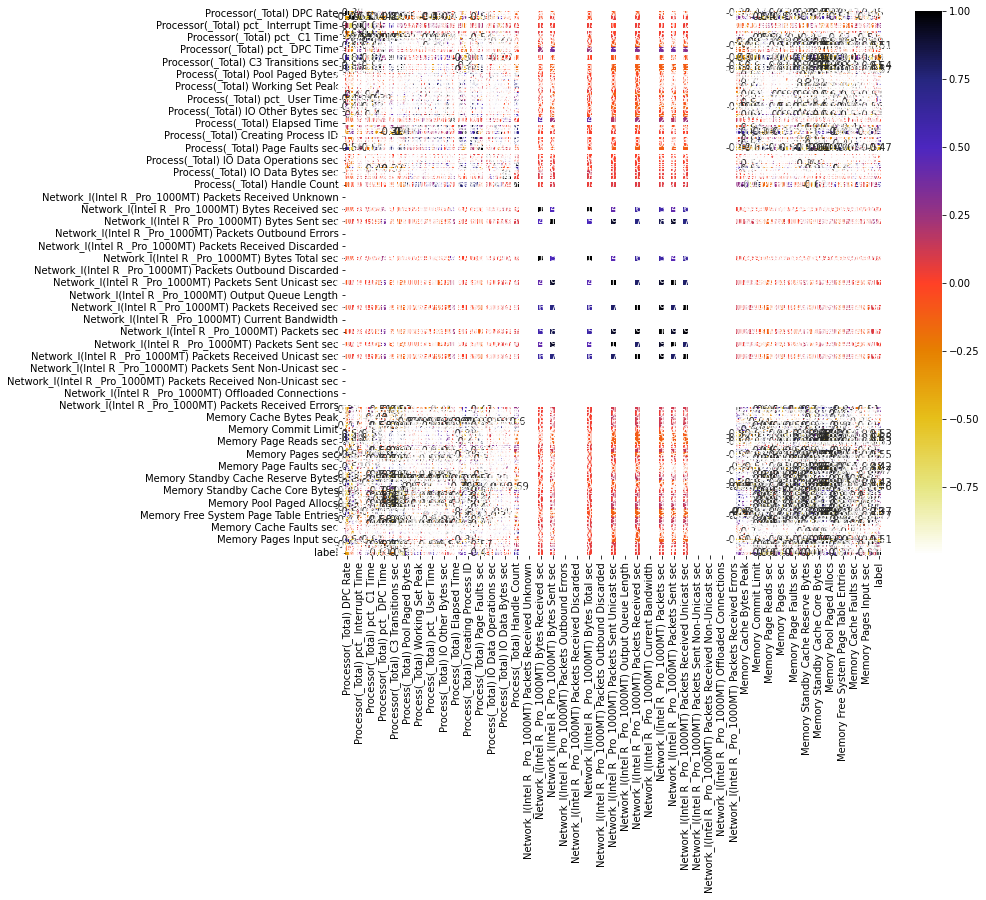

In [37]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [52]:
#rc = RidgeClassifier(alpha=1.0, copy_X=False, fit_intercept=True, max_iter=None,normalize=False, random_state=2, solver='saga')
rc=RidgeClassifier()

In [53]:
cv=cross_val_score(rc,X_train,y_train,cv=5)
print(cv)
np.mean(cv)


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.92424e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.96427e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[0.99833125 0.99874844 0.99916562 0.99833125 0.99833125]


0.9985815602836879

In [54]:
rc_fit = rc.fit(X_train, y_train)
y_pred_rc = rc_fit.predict(X_test)
rc_accuracy = accuracy_score(y_test, y_pred_rc)
print(classification_report(y_test,y_pred_rc))
print(rc_accuracy)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       445
           1       1.00      1.00      1.00       547
           2       1.00      1.00      1.00       251
           3       1.00      1.00      1.00      2479
           4       0.99      1.00      1.00       194
           5       1.00      1.00      1.00        19
           6       1.00      1.00      1.00        59
           7       0.00      0.00      0.00         1

    accuracy                           1.00      3995
   macro avg       0.87      0.88      0.87      3995
weighted avg       1.00      1.00      1.00      3995

0.9997496871088861


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
All_W7.type.value_counts()

3    10000
1     2134
0     1779
2      998
4      757
6      226
5       82
7        4
Name: type, dtype: int64

In [49]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7}

In [50]:
set(y_test)

{0, 1, 2, 3, 4, 5, 6, 7}

In [56]:
# Precision Recall and F1 Score
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred_rc,average='weighted')

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.9995006578736241, 0.9997496871088861, 0.9996248524022637, None)

In [41]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

In [58]:
val=dict(zip(num,labels))

In [59]:
maping=set(y_train)
lebl=[val[i] for i in maping]

In [29]:
lebl

['backdoor',
 'ddos',
 'injection',
 'normal',
 'password',
 'ransomware',
 'scanning',
 'xss']

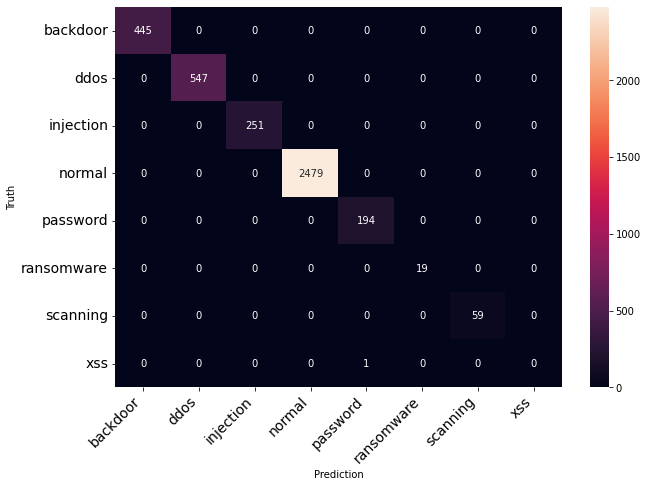

In [60]:
cm=confusion_matrix(y_test, y_pred_rc)
print_confusion_matrix(cm,lebl)

In [61]:
from imblearn.metrics import specificity_score,sensitivity_score
senc=sensitivity_score(y_test, y_pred_rc,average='weighted')
print('sensitivity_score is:')
print(senc)
sepe=specificity_score(y_test, y_pred_rc,average='weighted')
print('specificity_score:')
print(sepe)

sensitivity_score is:
0.9997496871088861
specificity_score:
0.9999872242302351


# Windows 10

In [24]:
df_W10

,Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ C3_Time,Processor_pct_ Interrupt_Time,Processor_pct_ C2_Time,Processor_pct_ User_Time,Processor_pct_ C1_Time,Processor_pct_ Processor_Time,Processor_C1_ransitions_sec,Processor_pct_ DPC_Time,...,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer,label,type
0,0,49.07244938,0,0.779671928,0,21.830814,49.07244938,45.5788994,405.2109934,0.155934386,...,0.035543669,0.035727836,0.006138575,980725.4671,61.12065428,16125.91191,1.184788963,0.000584015,1,dos
1,17,0,0,1.170522789,0,38.15904291,0,100,0,2.41908043,...,0.071868506,0.113428645,1.38968492,695437.4911,56.84042385,17923.5993,2.403132421,0.001995776,1,dos
2,11,0,0,0.546510062,0,65.1127703,0,100,0,0.312291464,...,0.010271601,0.023255341,0.432790999,691341.4197,9.388015072,86462.6383,0.342387367,0.002475624,1,dos
3,0,0,0,0.78081667,0,68.94611198,0,100,0,1.015061671,...,0.062088903,0.070302274,0.273779061,1039903.208,81.89439351,13206.97436,2.069629418,0.000858868,1,dos
4,0,0,0,0.468739969,0,66.0142123,0,100,0,0.156246656,...,0.100304043,0.123923448,0.787313151,2498188.869,190.1717481,15214.36803,3.34346845,0.000651557,1,dos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21099,0,48.02591125,0,0.234004125,0,43.52476716,48.02591125,50.0791201,147.5671891,0.15600275,...,0.001008811,0.001143588,0.004491881,11859.68944,1.297952273,14493.53846,0.033627703,0.000881077,1,mitm
21100,0,63.66271811,0,0.078245719,0,30.75056759,63.66271811,34.35184171,165.8555585,0,...,0.001484681,0.001533736,0.001635523,29946.94375,4.30663588,8477.767442,0.049489353,0.000356133,1,mitm
21101,1,82.34150729,0,0,0,15.21082955,82.34150729,16.30143536,189.6071196,0,...,0.000447637,0.000447637,0,15182.94736,1.497686568,10137.6,0.014921902,0.000298887,1,mitm
21102,0,38.79268029,0,0.156245925,0,23.04627395,38.79268029,59.84479725,172.9953291,0.156245925,...,0.000617754,0.000690462,0.002422937,12697.25717,0.899975701,17749.33333,0.020592463,0.0007672,1,mitm


In [25]:
# Finding mean and replace the missing value with mean
mean_val=[]
for i in df_W10.columns[:-1]:
  temp=df_W10.drop(df_W10[df_W10[i]==' '].index)
  temp=np.mean(temp[i].astype(float))
  mean_val.append(temp)
  df_W10[i].replace(' ',temp,inplace=True)
  df_W10[i]=df_W10[i].astype(float)
  
x=0
for i in df_W10.columns[:-1]:
  df_W10[i].replace('',mean_val[x],inplace=True)
  df_W10[i]=df_W10[i].astype(float)
  x=x+1

In [26]:
# Converting all object rows in numeric values
for i in df_W10.columns[:-1]:
  df_W10[i]=df_W10[i].astype(float)

In [27]:
df_W10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21104 entries, 0 to 21103
Columns: 126 entries, Processor_DPC_Rate to type
dtypes: float64(125), object(1)
memory usage: 20.3+ MB


In [28]:
All_W10=df_W10
labels=list(All_W10.type.value_counts().index)
All_W10['type']=LabelEncoder().fit_transform(All_W10['type'])
num=list(All_W10.type.value_counts().index)
#All_W10['type']=LabelEncoder().fit_transform(All_W10['type'])

In [29]:
X=All_W10.iloc[:,:-1]
y=All_W10.iloc[:,-1]

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5)

In [31]:
X_train.corr()

,Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ C3_Time,Processor_pct_ Interrupt_Time,Processor_pct_ C2_Time,Processor_pct_ User_Time,Processor_pct_ C1_Time,Processor_pct_ Processor_Time,Processor_C1_ransitions_sec,Processor_pct_ DPC_Time,...,LogicalDisk(_Total) Avg Disk Bytes Read,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer,label
Processor_DPC_Rate,1.000000,-0.254104,NaN,0.082494,NaN,0.006232,-0.254104,0.188226,0.646533,0.417305,...,0.009175,0.098447,0.668887,0.601007,0.499186,0.728661,0.017947,0.048712,0.006333,-0.228114
Processor_pct_ Idle_Time,-0.254104,1.000000,NaN,-0.380639,NaN,-0.815552,1.000000,-0.991728,-0.233695,-0.356954,...,-0.164570,-0.089502,-0.289287,-0.284346,-0.375766,-0.363150,-0.008171,-0.043047,-0.022276,0.114450
Processor_pct_ C3_Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Processor_pct_ Interrupt_Time,0.082494,-0.380639,NaN,1.000000,NaN,0.116736,-0.380639,0.370790,0.166673,0.485321,...,0.055893,0.110586,0.078492,0.132717,0.236572,0.073195,0.143149,0.096486,0.051299,0.143066
Processor_pct_ C2_Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LogicalDisk(_Total) Disk Transfers sec,0.728661,-0.363150,NaN,0.073195,NaN,0.060282,-0.363150,0.291622,0.814325,0.360364,...,0.019813,0.149980,0.810579,0.724071,0.652138,1.000000,-0.036543,0.076427,-0.009029,-0.315957
LogicalDisk(_Total) Avg Disk Bytes Transfer,0.017947,-0.008171,NaN,0.143149,NaN,0.015168,-0.008171,0.013128,0.052904,0.275489,...,0.236701,0.036262,-0.007992,0.002254,0.149449,-0.036543,1.000000,0.037365,0.112266,-0.142556
LogicalDisk(_Total) pct_ Disk Write Time,0.048712,-0.043047,NaN,0.096486,NaN,-0.025764,-0.043047,-0.013216,0.162525,0.000707,...,0.155077,0.990196,0.390601,0.213191,0.274194,0.076427,0.037365,1.000000,0.590163,-0.199715
LogicalDisk(_Total) Avg Disk sec Transfer,0.006333,-0.022276,NaN,0.051299,NaN,-0.008380,-0.022276,-0.015312,0.013680,0.027261,...,0.110685,0.584618,0.278423,0.209003,0.101262,-0.009029,0.112266,0.590163,1.000000,-0.132103


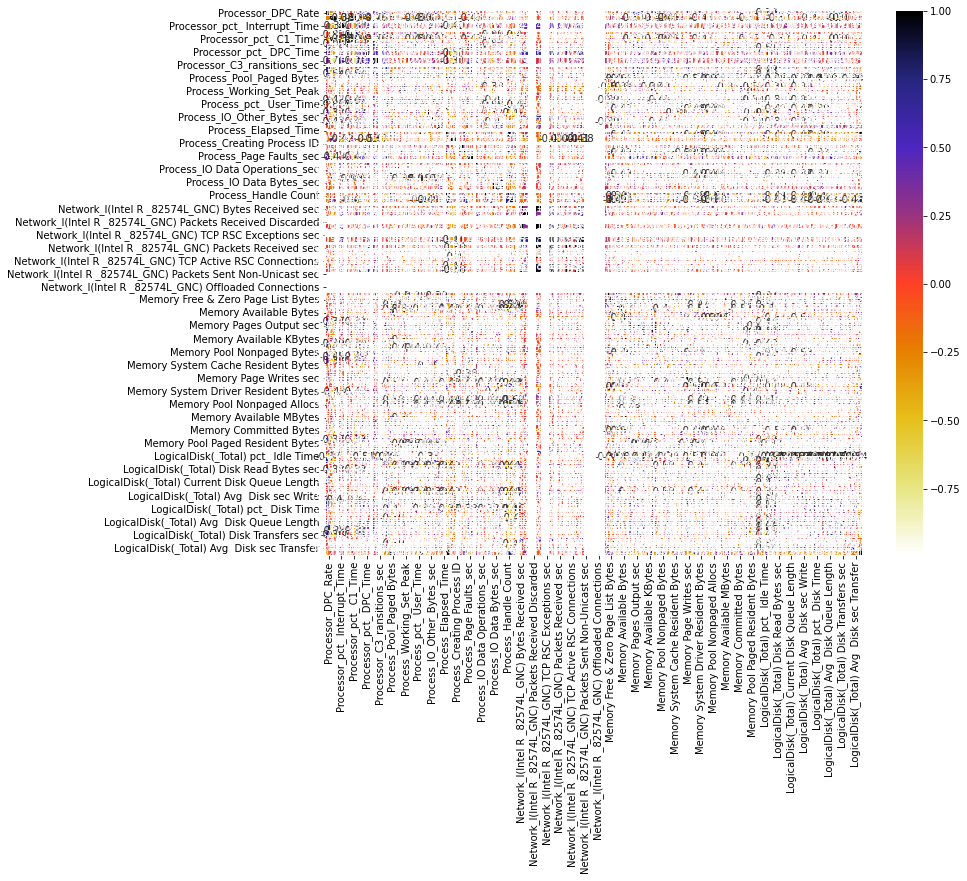

In [32]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [33]:
#rc = RidgeClassifier(alpha=1.0, copy_X=False, fit_intercept=True, max_iter=None,normalize=False, random_state=2, solver='saga')
rc=RidgeClassifier()

In [34]:
cv=cross_val_score(rc,X_train,y_train,cv=5)
print(cv)
np.mean(cv)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.05071e-33): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[0.9949463  0.99305117 0.9949463  0.9971564  0.99620853]


0.99526174130947

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15828 entries, 14478 to 2915
Columns: 125 entries, Processor_DPC_Rate to label
dtypes: float64(125)
memory usage: 15.2 MB


In [36]:
rc_fit = rc.fit(X_train, y_train)
y_pred_rc = rc_fit.predict(X_test)
rc_accuracy = accuracy_score(y_test, y_pred_rc)
print(classification_report(y_test,y_pred_rc))
print(rc_accuracy)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1143
           1       1.00      0.90      0.95       139
           2       1.00      1.00      1.00       144
           3       0.00      0.00      0.00         3
           4       1.00      1.00      1.00      2503
           5       0.99      1.00      1.00       904
           6       1.00      0.97      0.98       101
           7       1.00      1.00      1.00       339

    accuracy                           1.00      5276
   macro avg       0.87      0.86      0.87      5276
weighted avg       1.00      1.00      1.00      5276

0.9962092494313874


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
# Precision Recall and F1 Score
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred_rc,average='weighted')

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.9956775683781788, 0.9962092494313874, 0.9958595768672337, None)

In [38]:
val=dict(zip(num,labels))

In [39]:
maping=set(y_train)
lebl=[val[i] for i in maping]

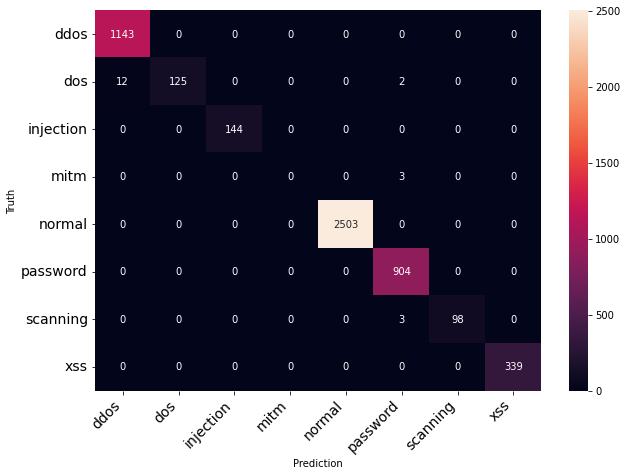

In [42]:
cm=confusion_matrix(y_test, y_pred_rc)
print_confusion_matrix(cm,lebl)

In [43]:
from imblearn.metrics import specificity_score,sensitivity_score
senc=sensitivity_score(y_test, y_pred_rc,average='weighted')
print('sensitivity_score is:')
print(senc)
sepe=specificity_score(y_test, y_pred_rc,average='weighted')
print('specificity_score:')
print(sepe)

sensitivity_score is:
0.9962092494313874
specificity_score:
0.9990574644456504
